# Importing necessary libraries


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler

In [2]:
# Set visualization style
sns.set(style="darkgrid")

In [3]:
# Directory path to save the CSV files
output_path = '../data/raw/'

In [4]:

# Function to load data from Yahoo Finance for a specific asset
def load_data(symbol, start_date='2015-01-01', end_date='2024-10-31'):
 data = yf.download(symbol, start=start_date, end=end_date)
 data['Symbol'] = symbol  # Add symbol column to identify asset
    
# Save the data to a CSV file in the raw data folder
 data.to_csv(f"{output_path}{symbol}_data.csv")
 return data

# Load data for all assets (TSLA, BND, SPY)


In [6]:
# Load data for all assets (TSLA, BND, SPY) and save them as CSVs
tsla_data = load_data('TSLA')
bnd_data = load_data('BND')
spy_data = load_data('SPY')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Data Cleaning - Handling Missing Value


In [7]:
# Fill missing values using forward fill method (you can also use other methods such as interpolation)
tsla_data.fillna(method='ffill', inplace=True)
bnd_data.fillna(method='ffill', inplace=True)
spy_data.fillna(method='ffill', inplace=True)

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_32568\3114325919.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data.fillna(method='ffill', inplace=True)
C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_32568\3114325919.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bnd_data.fillna(method='ffill', inplace=True)
C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_32568\3114325919.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data.fillna(method='ffill', inplace=True)


In [8]:
# Confirm missing values are handled
print("\nTSLA Missing Values After Fill:")
print(tsla_data.isnull().sum())


TSLA Missing Values After Fill:
Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
Symbol               0
dtype: int64


In [9]:
print("\nBND Missing Values After Fill:")
print(bnd_data.isnull().sum())


BND Missing Values After Fill:
Price      Ticker
Adj Close  BND       0
Close      BND       0
High       BND       0
Low        BND       0
Open       BND       0
Volume     BND       0
Symbol               0
dtype: int64


In [10]:

print("\nSPY Missing Values After Fill:")
print(spy_data.isnull().sum())




SPY Missing Values After Fill:
Price      Ticker
Adj Close  SPY       0
Close      SPY       0
High       SPY       0
Low        SPY       0
Open       SPY       0
Volume     SPY       0
Symbol               0
dtype: int64


# Normalize or Scale Data if Required


In [ ]:
scaler = StandardScaler()

In [12]:
tsla_data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(tsla_data[['Open', 'High', 'Low', 'Close', 'Volume']])
bnd_data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(bnd_data[['Open', 'High', 'Low', 'Close', 'Volume']])
spy_data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(spy_data[['Open', 'High', 'Low', 'Close', 'Volume']])


# Exploratory Data Analysis (EDA)


### 1. Visualize the closing price over time to identify trends and patterns

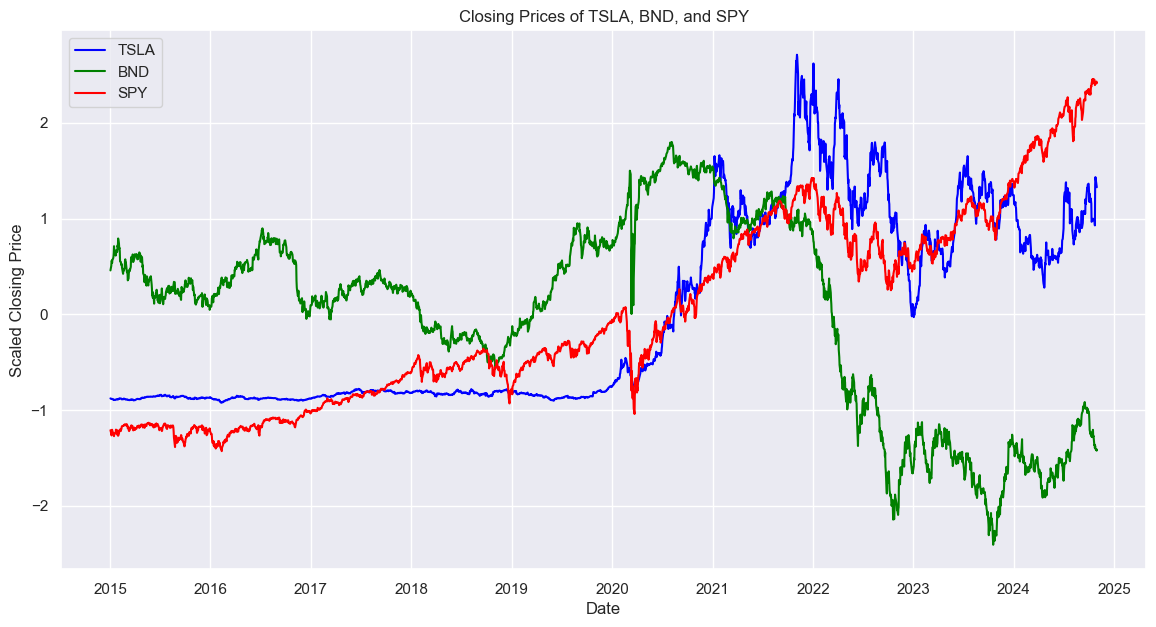

In [14]:

plt.figure(figsize=(14, 7))
plt.plot(tsla_data['Close'], label='TSLA', color='blue')
plt.plot(bnd_data['Close'], label='BND', color='green')
plt.plot(spy_data['Close'], label='SPY', color='red')
plt.title('Closing Prices of TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Scaled Closing Price')
plt.legend()
plt.show()

#### 2. Calculate and plot the daily percentage change to observe volatility

In [15]:
tsla_data['Daily Change'] = tsla_data['Close'].pct_change() * 100
bnd_data['Daily Change'] = bnd_data['Close'].pct_change() * 100
spy_data['Daily Change'] = spy_data['Close'].pct_change() * 100

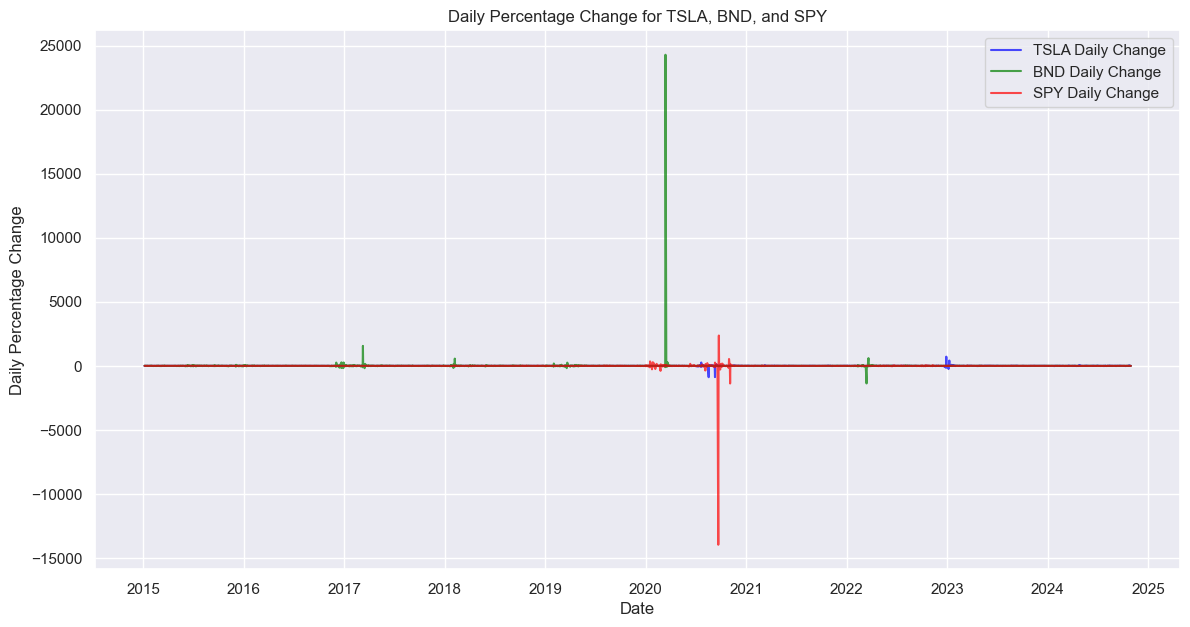

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(tsla_data['Daily Change'], label='TSLA Daily Change', color='blue', alpha=0.7)
plt.plot(bnd_data['Daily Change'], label='BND Daily Change', color='green', alpha=0.7)
plt.plot(spy_data['Daily Change'], label='SPY Daily Change', color='red', alpha=0.7)
plt.title('Daily Percentage Change for TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change')
plt.legend()
plt.show()